Three major trends observed:
1. Capomulin was by far the most effective drug in reducing tumor volume, reducing volume by nearly 20% over the 45 day period compared to respective tumor growth rates of ~45% and ~55% observed in Mice given Infubinol and Ketapril

2. Capomulin's effectiveness at reducing tumor volume appears to have brought about a significant improvement in survival rates compared to other drugs, as mice on Capomulin saw an 84% survival rate at the end of the 45 day period compared to the sub-50% survival rate of mice given Infubinol, Ketapril, or a placebo

3. Mice given Katapril did not experience a significantly slower rate of metastatic spread over the study period compared to those given a placebo treatment

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
full_df = clinical_trial_data.merge(mouse_drug_data, how = 'left')

# Display the data table for preview
full_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
full_df = clinical_trial_data.merge(mouse_drug_data, how = 'left')

## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = pd.DataFrame(
    full_df.groupby(by=['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
)
# Convert to DataFrame

# Preview DataFrame
mean_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_volume = pd.DataFrame(
full_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
)

se_tumor_volume.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [6]:
# Minor Data Munging to Re-Format the Data Frames
mean_df_unstacked = mean_tumor_volume.unstack(level = 0)
sem_df_unstacked = se_tumor_volume.unstack(level = 0)
# Preview that Reformatting worked

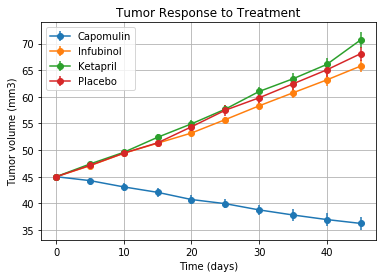

In [7]:
# Generate the Plot (with Error Bars)
mean_df_unstacked.iloc[:,[0,2,3,5]].plot(
    yerr = sem_df_unstacked.iloc[:,[0,2,3,5]],
    marker = 'o'
)
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.xlabel('Time (days)')
plt.ylabel('Tumor volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.grid()

# Save the Figure

In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_sites = pd.DataFrame(
full_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
)
# Convert to DataFrame
mean_sites.head()
# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_sites = pd.DataFrame(
full_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
)
# Convert to DataFrame
sem_sites.head()
# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
mean_sites_unstacked = mean_sites.unstack(level = 0)
sem_sites_unstacked = sem_sites.unstack(level = 0)
# Preview that Reformatting worked
mean_sites_unstacked.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

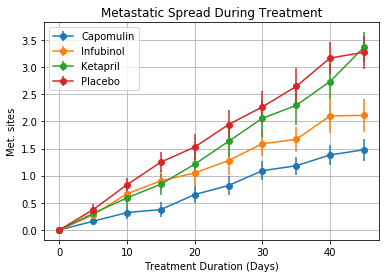

In [12]:
# Generate the Plot (with Error Bars)
mean_sites_unstacked.iloc[:,[0,2,3,5]].plot(
yerr = sem_sites_unstacked.iloc[:,[0,2,3,5]],
marker = 'o'
)
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. sites')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.grid()

# Save the Figure
# Show the Figure


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = pd.DataFrame(
    full_df.groupby(by=['Drug','Timepoint'])['Mouse ID'].count()
)
# Convert to DataFrame
mouse_count.head()
# Preview DataFrame


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [14]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_unstacked = mouse_count.unstack(level = 0)
# Preview the Data Frame
mouse_count_unstacked.head()
mouse_count_unstacked_pct = mouse_count_unstacked.div(mouse_count_unstacked.iloc[0])*100

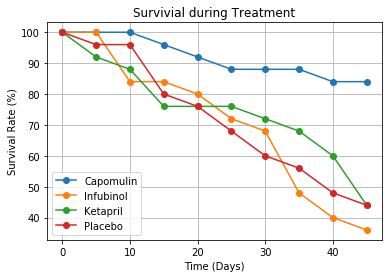

In [15]:
# Generate the Plot (Accounting for percentages)
mouse_count_unstacked_pct.iloc[:,[0,2,3,5]].plot(
marker = 'o'
)
plt.grid()
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.title('Survivial during Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
bar_data = pd.DataFrame({
    "Capomulin": ((mean_df_unstacked.iloc[-1:,0]/45)-1)*100,
    "Infubinol": ((mean_df_unstacked.iloc[-1:,2]/45)-1)*100,
    "Ketapril": ((mean_df_unstacked.iloc[-1:,3]/45)-1)*100,
    "Placebo": ((mean_df_unstacked.iloc[-1:,5]/45)-1)*100
    
})



# Display the data to confirm


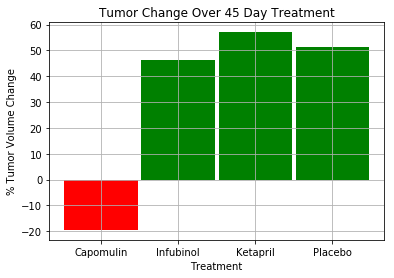

In [32]:
# Store all Relevant Percent Changes into a Tuple
plt.bar(bar_data.columns, bar_data[bar_data> 0].iloc[0], width = 0.95, color = 'green')
plt.bar(bar_data.columns, bar_data[bar_data <= 0].iloc[0], width = 0.95, color = 'red')
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.xlabel('Treatment')
plt.grid()
